In [66]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb, rgb_to_hsv

sns.set_theme(palette="bright", style="whitegrid")
matplotlib.rcParams['font.serif'] = "cmb10"
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['text.usetex'] = True

In [14]:
dat = []
with open("../bbb_res/scaling.txt") as in_file:
    buf = 0
    threads = 0
    overhead = 0
    n_k_mers = 0
    ins_time = 0
    mem = 0
    for l in in_file:
        if l.startswith("max buffer size (ish):"):
           buf = float(l.split()[-2])
        if l.startswith("max threads"):
           threads = int(l.split()[-1])
        if l.startswith("Added"):
            ss = l.split()
            ins_time = float(ss[-2]) / 1000
            n_k_mers = int(ss[1])
        if "elapsed" in l:
            ss = l.split()
            mem = float(ss[-1].split('m')[0]) / 1024
            ss = ss[2].split(":")
            overhead = float(ss[-1].split('e')[0])
            if len(ss) > 1:
                overhead += int(ss[-2]) * 60
            if len(ss) > 2:
                overhead += int(ss[-3]) * 60**2
            overhead -= ins_time
            dat.append((buf, threads, overhead, n_k_mers, ins_time, mem))

In [17]:
df = pd.DataFrame(columns=("buf", "threads", "overhead", "k-mers", "time", "mem"), data=dat)

In [28]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(x: 'float | ArrayLike', height: 'float | ArrayLike', width: 'float | ArrayLike' = 0.8, bottom: 'float | ArrayLike | None' = None, *, align: "Literal['center', 'edge']" = 'center', data=None, **kwargs) -> 'BarContainer'
    Make a bar plot.

    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *height* and *width*. The vertical baseline
    is *bottom* (default 0).

    Many parameters can take either a single value applying to all bars
    or a sequence of values, one for each bar.

    Parameters
    ----------
    x : float or array-like
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.

    height : float or array-like
        The height(s) of the bars.

        Note that if *bottom* has units (e.g. datetime), *height* should be in
        units that are a difference from the value of *bottom* (e.g. timedelta).

    width

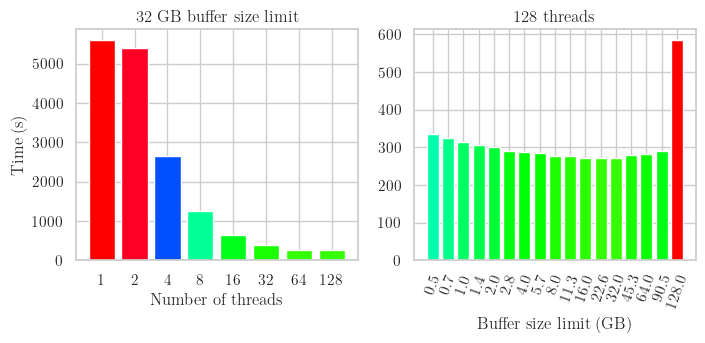

In [91]:
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
tdf = df[df["buf"] == float(32)].copy().sort_values("threads")
mc = max(tdf["time"])
mi_c = min(tdf["time"])
mc = [
    hsv_to_rgb((0.7 * (t - mi_c)/(mc - mi_c) + 0.3, 1, 1)) for t in tdf["time"]
]
plt.bar([i for i in range(1, len(tdf) + 1)], tdf["time"], tick_label=[str(v) for v in tdf["threads"]], color=mc)
a, b = plt.ylim()
plt.ylim((0, b))
plt.ylabel("Time (s)")
plt.xlabel("Number of threads")
plt.title("32 GB buffer size limit")

plt.subplot(1, 2, 2)
tdf = df[df["threads"] == 128].copy().sort_values("buf")
mc = max(tdf["time"])
mi_c = min(tdf["time"])
mc = [
    hsv_to_rgb((0.7 * (t - mi_c)/(mc - mi_c) + 0.3, 1, 1)) for t in tdf["time"]
]
plt.bar([i for i in range(1, len(tdf) + 1)], tdf["time"], tick_label=[str(v) for v in tdf["buf"]], color=mc)
a, b = plt.ylim()
plt.ylim((0, b))
plt.xlabel("Buffer size limit (GB)")
plt.title("128 threads")
plt.xticks(rotation=70)
plt.savefig("e-coli_scaling.pdf", bbox_inches="tight")
plt.show()

In [92]:
!pwd

/home/saska/CBL_experiments
